# (These are draft figures; we've modified them heavily)

In [1]:
%matplotlib inline
import math
import os.path
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

import pylab
import collections

In [2]:
# Colors & matplotlib style

viridian         = "#4b9179ff" # Green with a hint of blue
selective_yellow = "#ffb500ff" # Excavator yellow
rose             = "#ff1164ff"
hot_pink         = "#ff70b0ff" 
steel_blue       = "#3e80b8ff" 
bone             = "#ded5baff" # Off-white
white_rock       = "#f1ece0ff" # Lighter off-white
fuscous_gray     = "#5c594fff" # Darkish gray
newblack         = "#0e3452ff" # Almost black, blue-tinted

plt.rcParams["figure.autolayout"] = True

# Style legend box
plt.rcParams["legend.fancybox"] = False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams["legend.edgecolor"] = '1'
plt.rcParams["legend.facecolor"] = 'white'

plt.rcParams["axes.facecolor"] = white_rock

# Despine
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.bottom"] = False
plt.rcParams["axes.spines.left"] = False

# Plass Hardtrim plot

In [3]:
filename = "./files_hu_content/plass-hardtrim-all-bin-PF00521-hmmscanT100-mds.csv"

df = pd.read_csv(filename)

# Remove spaces from some fields
df['abbreviation'] = df['abbreviation'].apply(lambda s: s.strip())
df['abbreviation2'] = df['abbreviation2'].apply(lambda s: s.strip())

groups = set(df.abbreviation)

df

,V1,V2,query,origin,accession,taxonomy,abbreviation,abbreviation2,gc,coverage,sample_origin,bin_size,kingdom,group,phylum,class,order,family,genus
0,-0.006065,-0.046333,hu-genome19,BIN,>gi|973126483|gb|LGGQ01000001.1|,Microgenomates bacterium 39_7,M. bacterium 39_7,M. bacterium,39,7,SB1,703K,bacteria,NaN,Candidatus Microgenomates,NaN,NaN,NaN,NaN
1,-0.092293,-0.019586,hu-genome19,BIN,>gi|973126483|gb|LGGQ01000001.1|,Microgenomates bacterium 39_7,M. bacterium 39_7,M. bacterium,39,7,SB1,703K,bacteria,NaN,Candidatus Microgenomates,NaN,NaN,NaN,NaN
2,-0.141757,-0.042567,hu-genome23,BIN,>gi|973118751|gb|LGGM01000001.1|,Clostridiales bacterium 38_11,C. bacterium 38_11,C. bacterium,38,11,SB1,1.8M,bacteria,terrabacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN
3,-0.173084,-0.211349,hu-genome24,BIN,>gi|973115486|gb|LGGJ01000001.1|,Methanocalculus sp. 52_23,Methanocalculus sp. 52_23,Methanocalculus sp.,52,23,SB1,1.9M,archaea,NaN,Euryarchaeota,Methanomicrobia,Methanomicrobiales,Methanocalculaceae,Methanocalculus
4,-0.101332,-0.154313,hu-genome25,BIN,>gi|973115441|gb|LGGK01000001.1|,Anaerolineae bacterium 49_20,A. bacterium 49_20,An. Bacterium,49,20,SB1,1.0M,bacteria,terrabacteria,Chloroflexi,Anaerolineae,NaN,NaN,NaN
5,-0.116536,-0.155117,hu-genome25,BIN,>gi|973115441|gb|LGGK01000001.1|,Anaerolineae bacterium 49_20,A. bacterium 49_20,An. Bacterium,49,20,SB1,1.0M,bacteria,terrabacteria,Chloroflexi,Anaerolineae,NaN,NaN,NaN
6,-0.155649,-0.073653,hu-genome26,BIN,>gi|973112280|gb|LGGH01000001.1|,Mesotoga infera isolate 46_47,M. infera isolate 46_47,M. infera,46,47,SB1,1.2M,bacteria,NaN,Thermotogae,Thermotogae,Kosmotogales,Kosmotogaceae,Mesotoga
7,0.228700,0.028981,hu-genome27,BIN,>gi|973110956|gb|LGGI01000001.1|,Candidate division WS6 bacterium 36_33,WS6 bacterium 36_33,WS6 bacterium 2,36,33,SB1,439K,bacteria,candidate phyla,NaN,NaN,NaN,NaN,NaN
8,-0.152947,-0.145421,hu-genome33,BIN,>gi|973101184|gb|LGGB01000001.1|,Synergistales bacterium 53_16,S. bacterium 53_16,S. bacterium,53,16,SB1,1.7M,bacteria,NaN,Synergistetes,Synergistia,Syntergistales,NaN,NaN
9,-0.171149,-0.117019,hu-genome34,BIN,>gi|973097275|gb|LGGA01000001.1|,Atribacteria bacterium 34_128,A. bacterium 34_128,At. Bacterium,34,128,SB1,883K,bacteria,candidate phyla,NaN,NaN,NaN,NaN,NaN


In [4]:
from itertools import repeat

info = pd.DataFrame(index=groups)

# Create dataframe with various information about clusters
sizes = dict((group, len(df.loc[df.abbreviation == group].index)) for group in info.index)
info['size'] = info.index.map(sizes)
info = info.sort_values(['size'], ascending=False)

labels = dict((group, df.loc[df.abbreviation == group]['abbreviation2'].iloc[0]) for group in info.index)
info['label'] = info.index.map(labels)

kingdoms = dict((group, df.loc[df.abbreviation == group]['kingdom'].iloc[0]) for group in info.index)
info['kingdom'] = info.index.map(kingdoms)

colors = [rose, steel_blue, viridian, selective_yellow, hot_pink]
highlighted = len(colors)

colors_thin = [fuscous_gray, '#777660ff', '#8e8c73ff'] # [rose, steel_blue, selective_yellow]
group_size = len(colors_thin)
n = len(info.index)
thin_markers = ['x','1','2','3','4']
thick_markers = ['X','v','^','<','>']

# markers = ['o'] * highlighted + 
print(len([x for item in thin_markers for x in repeat(item, group_size)][:n]))

info['marker']      = (['o']*len(colors) + [x for item in thin_markers for x in repeat(item, group_size)])[:n]
info['marker_size'] = [75] * highlighted + [80] * (len(info.index) - highlighted)
info['linewidth']   = [0] * highlighted + [2] * (len(info.index) - highlighted)
info['alpha']       = [0.33] * highlighted + [0.8] * (len(info.index) - highlighted)

info['color'] = colors + [colors_thin[i%len(colors_thin)] for i in range(n-len(colors))]

info

15


,size,label,kingdom,marker,marker_size,linewidth,alpha,color
WS6 bacterium 36_33,116,WS6 bacterium 2,bacteria,o,75,0,0.33,#ff1164ff
WS6 bacterium 34_10,107,WS6 bacterium 1,bacteria,o,75,0,0.33,#3e80b8ff
Desulfotomaculum sp. 46_296,93,Desulfotomaculum sp.,bacteria,o,75,0,0.33,#4b9179ff
Methanocalculus sp. 52_23,30,Methanocalculus sp.,archaea,o,75,0,0.33,#ffb500ff
M. harundinacea isolate 57_489,27,M. harundinacea,archaea,o,75,0,0.33,#ff70b0ff
A. thermophila isolate 46_16,26,An. Thermophila,bacteria,x,80,2,0.80,#5c594fff
M. marisnigri isolate 62_101,15,M. marisnigri,archaea,x,80,2,0.80,#777660ff
A. bacterium 49_20,15,An. Bacterium,bacteria,x,80,2,0.80,#8e8c73ff
A. bacterium 34_128,12,At. Bacterium,bacteria,1,80,2,0.80,#5c594fff
M. infera isolate 46_47,10,M. infera,bacteria,1,80,2,0.80,#777660ff


In [5]:
# Join 'info' with main data
plotdf = df[['V1', 'V2', 'origin', 'abbreviation', 'abbreviation2']]

plotdf = plotdf.join(info, on='abbreviation')
plotdf

,V1,V2,origin,abbreviation,abbreviation2,size,label,kingdom,marker,marker_size,linewidth,alpha,color
0,-0.006065,-0.046333,BIN,M. bacterium 39_7,M. bacterium,2,M. bacterium,bacteria,2,80,2,0.80,#8e8c73ff
1,-0.092293,-0.019586,BIN,M. bacterium 39_7,M. bacterium,2,M. bacterium,bacteria,2,80,2,0.80,#8e8c73ff
2,-0.141757,-0.042567,BIN,C. bacterium 38_11,C. bacterium,2,C. bacterium,bacteria,3,80,2,0.80,#8e8c73ff
3,-0.173084,-0.211349,BIN,Methanocalculus sp. 52_23,Methanocalculus sp.,30,Methanocalculus sp.,archaea,o,75,0,0.33,#ffb500ff
4,-0.101332,-0.154313,BIN,A. bacterium 49_20,An. Bacterium,15,An. Bacterium,bacteria,x,80,2,0.80,#8e8c73ff
5,-0.116536,-0.155117,BIN,A. bacterium 49_20,An. Bacterium,15,An. Bacterium,bacteria,x,80,2,0.80,#8e8c73ff
6,-0.155649,-0.073653,BIN,M. infera isolate 46_47,M. infera,10,M. infera,bacteria,1,80,2,0.80,#777660ff
7,0.228700,0.028981,BIN,WS6 bacterium 36_33,WS6 bacterium 2,116,WS6 bacterium 2,bacteria,o,75,0,0.33,#ff1164ff
8,-0.152947,-0.145421,BIN,S. bacterium 53_16,S. bacterium,5,S. bacterium,bacteria,1,80,2,0.80,#8e8c73ff
9,-0.171149,-0.117019,BIN,A. bacterium 34_128,At. Bacterium,12,At. Bacterium,bacteria,1,80,2,0.80,#5c594fff


/Users/t/dev/py36/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


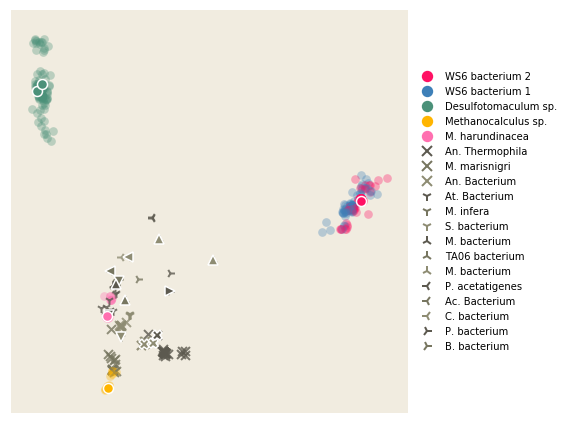

In [6]:
# Second attempt
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(8,6))

ax = fig.subplots()

# We sort by something that is reasonably arbitrary to
# have mixed z-orders
for i, row in plotdf.sort_values('V2', ascending=False).iterrows():
    ax.scatter(row.V1, row.V2, s=row.marker_size, lw=row.linewidth, 
               alpha=row.alpha, color=row.color, marker=row.marker)
    
# Plot BINs on top
marker_map = dict(zip(thin_markers, thick_markers))
marker_map['o'] = 'o'
for i, row in plotdf[plotdf['origin'] == 'BIN'].iterrows():
    marker = marker_map[row.marker]
    ax.plot(row.V1, row.V2, lw=row.linewidth, markersize=10,
               alpha=1, color=row.color, marker=marker, 
               markeredgewidth=1.5, markeredgecolor='white')    

ax.xaxis.set_ticks([], [])
ax.yaxis.set_ticks([], [])

# Construct legend
legend_markers = []
for _, row in info.iterrows():
    legend_markers.append(Line2D(range(1), range(1), color=row.color, marker=row.marker, 
                                 markersize=row.marker_size / 8, lw=0,
                                markeredgewidth=2))
    
leg = ax.legend(legend_markers, info.label, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("fig5a.pdf")

# Plass softtrim

In [7]:
filename = "./files_hu_content/plass-loosetrim-all-bin-PF00521-hmmscanT100-mds.csv"

df = pd.read_csv(filename)

# Remove spaces from some fields
df['abbreviation'] = df['abbreviation'].apply(lambda s: s.strip())
df['abbreviation2'] = df['abbreviation2'].apply(lambda s: s.strip())

groups = set(df.abbreviation)

df

,V1,V2,query,origin,accession,taxonomy,abbreviation,abbreviation2,gc,coverage,sample_origin,bin_size,kingdom,group,phylum,class,order,family,genus
0,-0.042048,-0.002973,hu-genome19,BIN,>gi|973126483|gb|LGGQ01000001.1|,Microgenomates bacterium 39_7,M. bacterium 39_7,M. bacterium,39,7,SB1,703K,bacteria,NaN,Candidatus Microgenomates,NaN,NaN,NaN,NaN
1,0.001768,-0.000775,hu-genome19,BIN,>gi|973126483|gb|LGGQ01000001.1|,Microgenomates bacterium 39_7,M. bacterium 39_7,M. bacterium,39,7,SB1,703K,bacteria,NaN,Candidatus Microgenomates,NaN,NaN,NaN,NaN
2,0.037201,-0.001680,hu-genome23,BIN,>gi|973118751|gb|LGGM01000001.1|,Clostridiales bacterium 38_11,C. bacterium 38_11,C. bacterium,38,11,SB1,1.8M,bacteria,terrabacteria,Firmicutes,Clostridia,Clostridiales,NaN,NaN
3,0.065709,0.100497,hu-genome24,BIN,>gi|973115486|gb|LGGJ01000001.1|,Methanocalculus sp. 52_23,Methanocalculus sp. 52_23,Methanocalculus sp.,52,23,SB1,1.9M,archaea,NaN,Euryarchaeota,Methanomicrobia,Methanomicrobiales,Methanocalculaceae,Methanocalculus
4,-0.011334,0.007327,hu-genome25,BIN,>gi|973115441|gb|LGGK01000001.1|,Anaerolineae bacterium 49_20,A. bacterium 49_20,An. Bacterium,49,20,SB1,1.0M,bacteria,terrabacteria,Chloroflexi,Anaerolineae,NaN,NaN,NaN
5,-0.000877,-0.022938,hu-genome25,BIN,>gi|973115441|gb|LGGK01000001.1|,Anaerolineae bacterium 49_20,A. bacterium 49_20,An. Bacterium,49,20,SB1,1.0M,bacteria,terrabacteria,Chloroflexi,Anaerolineae,NaN,NaN,NaN
6,0.044998,0.040931,hu-genome26,BIN,>gi|973112280|gb|LGGH01000001.1|,Mesotoga infera isolate 46_47,M. infera isolate 46_47,M. infera,46,47,SB1,1.2M,bacteria,NaN,Thermotogae,Thermotogae,Kosmotogales,Kosmotogaceae,Mesotoga
7,-0.323750,-0.021842,hu-genome27,BIN,>gi|973110956|gb|LGGI01000001.1|,Candidate division WS6 bacterium 36_33,WS6 bacterium 36_33,WS6 bacterium 2,36,33,SB1,439K,bacteria,candidate phyla,NaN,NaN,NaN,NaN,NaN
8,0.052417,-0.015845,hu-genome33,BIN,>gi|973101184|gb|LGGB01000001.1|,Synergistales bacterium 53_16,S. bacterium 53_16,S. bacterium,53,16,SB1,1.7M,bacteria,NaN,Synergistetes,Synergistia,Syntergistales,NaN,NaN
9,0.059963,0.015643,hu-genome34,BIN,>gi|973097275|gb|LGGA01000001.1|,Atribacteria bacterium 34_128,A. bacterium 34_128,At. Bacterium,34,128,SB1,883K,bacteria,candidate phyla,NaN,NaN,NaN,NaN,NaN


In [8]:
from itertools import repeat

info = pd.DataFrame(index=groups)

# Create dataframe with various information about clusters
sizes = dict((group, len(df.loc[df.abbreviation == group].index)) for group in info.index)
info['size'] = info.index.map(sizes)
info = info.sort_values(['size'], ascending=False)

labels = dict((group, df.loc[df.abbreviation == group]['abbreviation2'].iloc[0]) for group in info.index)
info['label'] = info.index.map(labels)

kingdoms = dict((group, df.loc[df.abbreviation == group]['kingdom'].iloc[0]) for group in info.index)
info['kingdom'] = info.index.map(kingdoms)

colors = [rose, steel_blue, viridian, selective_yellow, hot_pink]
highlighted = len(colors)

colors_thin = [fuscous_gray, '#777660ff', '#8e8c73ff'] # [rose, steel_blue, selective_yellow]
group_size = len(colors_thin)
n = len(info.index)
thin_markers = ['x','1','2','3','4']
thick_markers = ['X','v','^','<','>']

# markers = ['o'] * highlighted + 
print(len([x for item in thin_markers for x in repeat(item, group_size)][:n]))

info['marker']      = (['o']*len(colors) + [x for item in thin_markers for x in repeat(item, group_size)])[:n]
info['marker_size'] = [75] * highlighted + [80] * (len(info.index) - highlighted)
info['linewidth']   = [0] * highlighted + [2] * (len(info.index) - highlighted)
info['alpha']       = [0.33] * highlighted + [0.8] * (len(info.index) - highlighted)

info['color'] = colors + [colors_thin[i%len(colors_thin)] for i in range(n-len(colors))]

info

15


,size,label,kingdom,marker,marker_size,linewidth,alpha,color
Desulfotomaculum sp. 46_296,254,Desulfotomaculum sp.,bacteria,o,75,0,0.33,#ff1164ff
M. harundinacea isolate 57_489,235,M. harundinacea,archaea,o,75,0,0.33,#3e80b8ff
M. marisnigri isolate 62_101,180,M. marisnigri,archaea,o,75,0,0.33,#4b9179ff
WS6 bacterium 36_33,178,WS6 bacterium 2,bacteria,o,75,0,0.33,#ffb500ff
WS6 bacterium 34_10,160,WS6 bacterium 1,bacteria,o,75,0,0.33,#ff70b0ff
M. infera isolate 46_47,75,M. infera,bacteria,x,80,2,0.80,#5c594fff
A. thermophila isolate 46_16,74,An. Thermophila,bacteria,x,80,2,0.80,#777660ff
Methanocalculus sp. 52_23,62,Methanocalculus sp.,archaea,x,80,2,0.80,#8e8c73ff
A. bacterium 49_20,59,An. Bacterium,bacteria,1,80,2,0.80,#5c594fff
A. bacterium 66_15,54,Ac. Bacterium,bacteria,1,80,2,0.80,#777660ff


In [9]:
# Join 'info' with main data
plotdf = df[['V1', 'V2', 'origin', 'abbreviation', 'abbreviation2']]

plotdf = plotdf.join(info, on='abbreviation')
plotdf

,V1,V2,origin,abbreviation,abbreviation2,size,label,kingdom,marker,marker_size,linewidth,alpha,color
0,-0.042048,-0.002973,BIN,M. bacterium 39_7,M. bacterium,5,M. bacterium,bacteria,4,80,2,0.80,#777660ff
1,0.001768,-0.000775,BIN,M. bacterium 39_7,M. bacterium,5,M. bacterium,bacteria,4,80,2,0.80,#777660ff
2,0.037201,-0.001680,BIN,C. bacterium 38_11,C. bacterium,22,C. bacterium,bacteria,3,80,2,0.80,#5c594fff
3,0.065709,0.100497,BIN,Methanocalculus sp. 52_23,Methanocalculus sp.,62,Methanocalculus sp.,archaea,x,80,2,0.80,#8e8c73ff
4,-0.011334,0.007327,BIN,A. bacterium 49_20,An. Bacterium,59,An. Bacterium,bacteria,1,80,2,0.80,#5c594fff
5,-0.000877,-0.022938,BIN,A. bacterium 49_20,An. Bacterium,59,An. Bacterium,bacteria,1,80,2,0.80,#5c594fff
6,0.044998,0.040931,BIN,M. infera isolate 46_47,M. infera,75,M. infera,bacteria,x,80,2,0.80,#5c594fff
7,-0.323750,-0.021842,BIN,WS6 bacterium 36_33,WS6 bacterium 2,178,WS6 bacterium 2,bacteria,o,75,0,0.33,#ffb500ff
8,0.052417,-0.015845,BIN,S. bacterium 53_16,S. bacterium,45,S. bacterium,bacteria,1,80,2,0.80,#8e8c73ff
9,0.059963,0.015643,BIN,A. bacterium 34_128,At. Bacterium,26,At. Bacterium,bacteria,2,80,2,0.80,#777660ff


/Users/t/dev/py36/lib/python3.6/site-packages/matplotlib/figure.py:2362: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


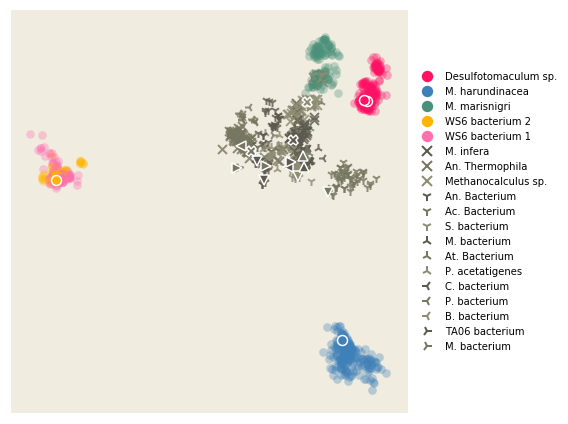

In [10]:
# Second attempt
from matplotlib.lines import Line2D

fig = plt.figure(figsize=(8,6))

ax = fig.subplots()

# We sort by something that is reasonably arbitrary to
# have mixed z-orders
for i, row in plotdf.sort_values('V2', ascending=False).iterrows():
    ax.scatter(row.V1, row.V2, s=row.marker_size, lw=row.linewidth, 
               alpha=row.alpha, color=row.color, marker=row.marker)
    
# Plot BINs on top
marker_map = dict(zip(thin_markers, thick_markers))
marker_map['o'] = 'o'
for i, row in plotdf[plotdf['origin'] == 'BIN'].iterrows():
    marker = marker_map[row.marker]
    ax.plot(row.V1, row.V2, lw=row.linewidth, markersize=10,
               alpha=1, color=row.color, marker=marker, 
               markeredgewidth=1.5, markeredgecolor='white')    

ax.xaxis.set_ticks([], [])
ax.yaxis.set_ticks([], [])

# Construct legend
legend_markers = []
for _, row in info.iterrows():
    legend_markers.append(Line2D(range(1), range(1), color=row.color, marker=row.marker, 
                                 markersize=row.marker_size / 8, lw=0,
                                markeredgewidth=2))
    
leg = ax.legend(legend_markers, info.label, loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig("fig5a-soft.pdf")